In [ ]:
import pandas as pd
import cv2
import os
import matplotlib.pyplot as plt
from PIL import Image


base_path = r"C:\Users\arfin\Downloads\covid xray\COVID-19_Radiography_Dataset\COVID-19_Radiography_Dataset"
# Load each metadata file
df_covid = pd.read_excel(os.path.join(base_path, "COVID.metadata.xlsx"))
df_normal = pd.read_excel(os.path.join(base_path, "Normal.metadata.xlsx"))
df_opacity = pd.read_excel(os.path.join(base_path, "Lung_Opacity.metadata.xlsx"))
df_pneumonia = pd.read_excel(os.path.join(base_path, "Viral Pneumonia.metadata.xlsx"))

# Add labels
df_covid["label"] = "COVID"
df_normal["label"] = "Normal"
df_opacity["label"] = "Lung_Opacity"
df_pneumonia["label"] = "Viral Pneumonia"

# Combine
df_all = pd.concat([df_covid, df_normal, df_opacity, df_pneumonia], ignore_index=True)
print(df_all.head(10))

shapes = []

for idx, row in df_all.iterrows():
    label = row['label']
    file = row['FILE NAME'] if 'FILE NAME' in row else row['filename']

    if not file.lower().endswith(('.png', '.jpg', '.jpeg')):
        file += '.png'

    image_path = os.path.join(base_path, label, 'images', file)

    if os.path.exists(image_path):
        img_color = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if img_color is not None:
            shapes.append(img_color.shape)
        else:
            shapes.append(None)
    else:
        shapes.append(None)

# Add shapes as a new column to our DataFrame
df_all['shape'] = shapes
print(df_all.head())

  FILE NAME FORMAT     SIZE  \
0   COVID-1    PNG  256*256   
1   COVID-2    PNG  256*256   
2   COVID-3    PNG  256*256   
3   COVID-4    PNG  256*256   
4   COVID-5    PNG  256*256   
5   COVID-6    PNG  256*256   
6   COVID-7    PNG  256*256   
7   COVID-8    PNG  256*256   
8   COVID-9    PNG  256*256   
9  COVID-10    PNG  256*256   

                                                 URL  label  
0  https://sirm.org/category/senza-categoria/covi...  COVID  
1  https://sirm.org/category/senza-categoria/covi...  COVID  
2  https://sirm.org/category/senza-categoria/covi...  COVID  
3  https://sirm.org/category/senza-categoria/covi...  COVID  
4  https://sirm.org/category/senza-categoria/covi...  COVID  
5  https://sirm.org/category/senza-categoria/covi...  COVID  
6  https://sirm.org/category/senza-categoria/covi...  COVID  
7  https://sirm.org/category/senza-categoria/covi...  COVID  
8  https://sirm.org/category/senza-categoria/covi...  COVID  
9  https://sirm.org/category/senza-cat

In [8]:
print(df_all.head())


  FILE NAME FORMAT     SIZE  \
0   COVID-1    PNG  256*256   
1   COVID-2    PNG  256*256   
2   COVID-3    PNG  256*256   
3   COVID-4    PNG  256*256   
4   COVID-5    PNG  256*256   

                                                 URL  label       shape  
0  https://sirm.org/category/senza-categoria/covi...  COVID  (299, 299)  
1  https://sirm.org/category/senza-categoria/covi...  COVID  (299, 299)  
2  https://sirm.org/category/senza-categoria/covi...  COVID  (299, 299)  
3  https://sirm.org/category/senza-categoria/covi...  COVID  (299, 299)  
4  https://sirm.org/category/senza-categoria/covi...  COVID  (299, 299)  


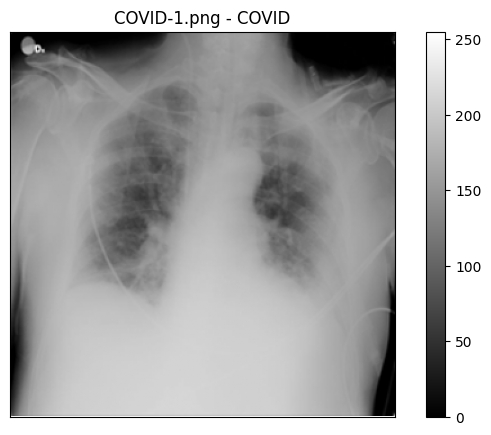

Statistics for COVID-1.png - COVID:
Dimensions: 299 pixels height, 299 pixels width
Maximum pixel value: 255.0000
Minimum pixel value: 0.0000
Mean pixel value: 145.8968
Standard deviation: 51.8166
--------------------------------------------------


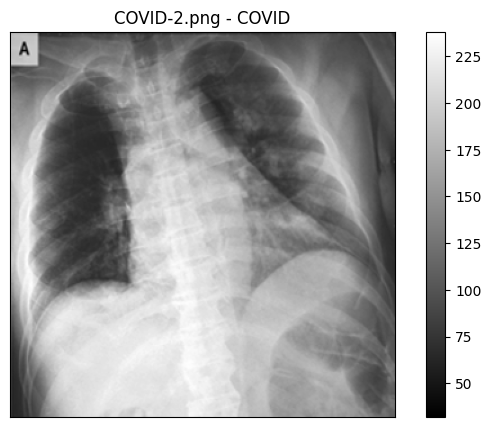

Statistics for COVID-2.png - COVID:
Dimensions: 299 pixels height, 299 pixels width
Maximum pixel value: 238.0000
Minimum pixel value: 32.0000
Mean pixel value: 150.6405
Standard deviation: 48.8677
--------------------------------------------------


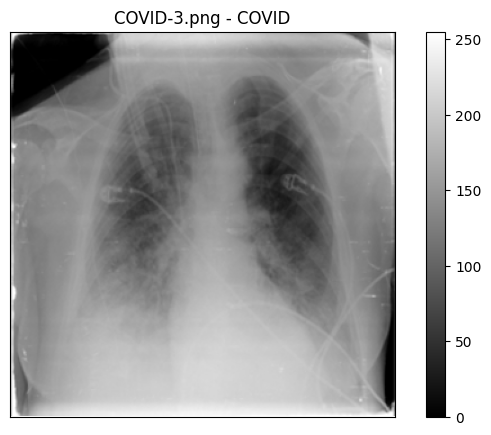

Statistics for COVID-3.png - COVID:
Dimensions: 299 pixels height, 299 pixels width
Maximum pixel value: 255.0000
Minimum pixel value: 0.0000
Mean pixel value: 140.5986
Standard deviation: 50.2007
--------------------------------------------------


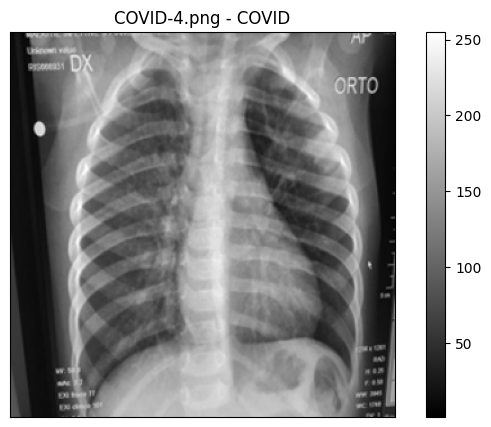

Statistics for COVID-4.png - COVID:
Dimensions: 299 pixels height, 299 pixels width
Maximum pixel value: 255.0000
Minimum pixel value: 1.0000
Mean pixel value: 116.7147
Standard deviation: 57.7198
--------------------------------------------------


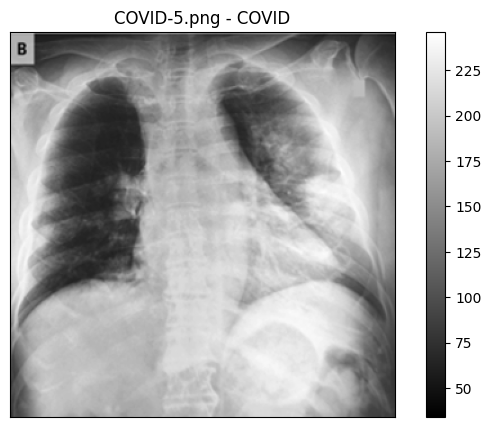

Statistics for COVID-5.png - COVID:
Dimensions: 299 pixels height, 299 pixels width
Maximum pixel value: 246.0000
Minimum pixel value: 34.0000
Mean pixel value: 167.8358
Standard deviation: 48.4134
--------------------------------------------------


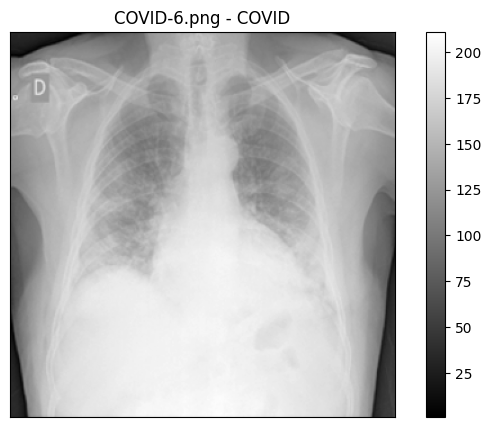

Statistics for COVID-6.png - COVID:
Dimensions: 299 pixels height, 299 pixels width
Maximum pixel value: 211.0000
Minimum pixel value: 1.0000
Mean pixel value: 152.1021
Standard deviation: 39.9365
--------------------------------------------------


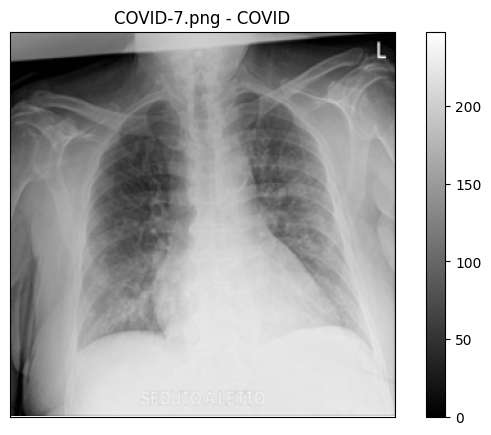

Statistics for COVID-7.png - COVID:
Dimensions: 299 pixels height, 299 pixels width
Maximum pixel value: 248.0000
Minimum pixel value: 0.0000
Mean pixel value: 149.3702
Standard deviation: 56.6742
--------------------------------------------------


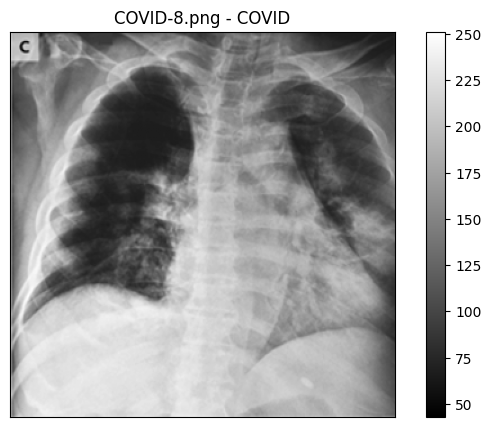

Statistics for COVID-8.png - COVID:
Dimensions: 299 pixels height, 299 pixels width
Maximum pixel value: 251.0000
Minimum pixel value: 43.0000
Mean pixel value: 160.4758
Standard deviation: 49.2913
--------------------------------------------------


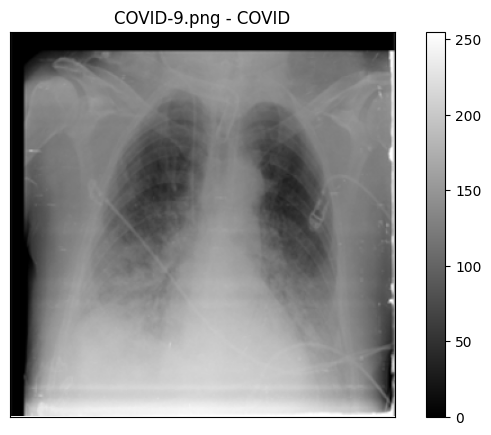

Statistics for COVID-9.png - COVID:
Dimensions: 299 pixels height, 299 pixels width
Maximum pixel value: 255.0000
Minimum pixel value: 0.0000
Mean pixel value: 125.1422
Standard deviation: 56.7007
--------------------------------------------------


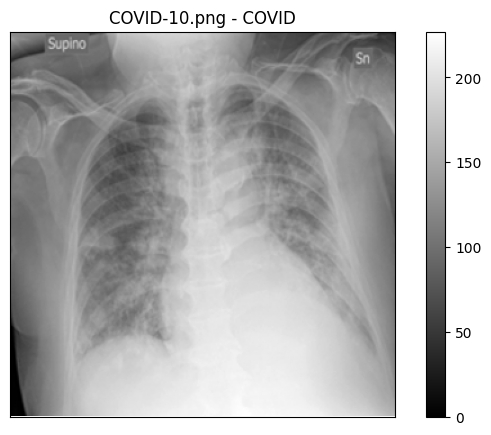

Statistics for COVID-10.png - COVID:
Dimensions: 299 pixels height, 299 pixels width
Maximum pixel value: 227.0000
Minimum pixel value: 0.0000
Mean pixel value: 141.3555
Standard deviation: 40.6233
--------------------------------------------------


In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

# Loop through the first 10 rows of dataframe
for idx, row in df_all.head(10).iterrows():
    label = row['label']
    file = row['FILE NAME']

    # Ensure image file has the correct extension
    if not file.lower().endswith(('.png', '.jpg', '.jpeg')):
        file += '.png'

    # Construct the image path
    image_path = os.path.join(base_path, label, 'images', file)

    # Load the image in grayscale
    img_gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Check if the image is loaded properly
    if img_gray is not None:
        # Image visualization
        plt.figure(figsize=(8, 5))
        plt.imshow(img_gray, cmap='gray')
        plt.xticks([])  # Hide x-axis ticks
        plt.yticks([])  # Hide y-axis ticks
        plt.title(f"{file} - {label}")
        plt.colorbar()  # Add colorbar to visualize intensity range
        plt.show()

        # Calculate and print statistics
        print(f"Statistics for {file} - {label}:")
        print(f"Dimensions: {img_gray.shape[0]} pixels height, {img_gray.shape[1]} pixels width")
        print(f"Maximum pixel value: {img_gray.max():.4f}")
        print(f"Minimum pixel value: {img_gray.min():.4f}")
        print(f"Mean pixel value: {img_gray.mean():.4f}")
        print(f"Standard deviation: {img_gray.std():.4f}")
        print("-" * 50)


In [ ]:
#some images are in RGB standardising them'
import os
import cv2
import pandas as pd
import numpy as np

# Path setup
base_path = base_path = r"C:/Users/arfin/Downloads/covid xray/COVID-19_Radiography_Dataset/COVID-19_Radiography_Dataset"

# Load metadata from the Excel file
metadata_path = "C:/Users/arfin/Downloads/covid xray/image_metadata_summary.xlsx"
df = pd.read_excel(metadata_path)

# List to track conversion status
conversion_status = []

# Output folder ( to save standardized images)
output_folder = os.path.join(base_path, "converted_grayscale")
os.makedirs(output_folder, exist_ok=True)

# Process images
for idx, row in df.iterrows():
    label = row['label']
    file = row['filename'] if 'filename' in row else row['FILE NAME']

    # Ensure file extension
    if not file.lower().endswith(('.png', '.jpg', '.jpeg')):
        file += '.png'

    image_path = os.path.join(base_path, label, 'images', file)

    if os.path.exists(image_path):
        # Read image in color (in case it's RGB)
        img_color = cv2.imread(image_path)

        if img_color is not None:
            # Convert to grayscale
            img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)

            # Save standardized image
            save_path = os.path.join(output_folder, f"{label}_{file}")
            cv2.imwrite(save_path, img_gray)

            # Record status
            conversion_status.append((file, "converted", img_gray.shape))
        else:
            conversion_status.append((file, "failed to read", None))
    else:
        conversion_status.append((file, "file missing", None))

# Create a DataFrame of conversion results
df_conversion = pd.DataFrame(conversion_status, columns=['filename', 'status', 'shape'])

# Save conversion report
df_conversion.to_csv("C:/Users/arfin/Downloads/covid xray/image_conversion_report.csv", index=False)

print(" Image conversion complete. Report saved.")


✅ Image conversion complete. Report saved.


In [ ]:
import os
import pandas as pd
import numpy as np
from PIL import Image
from collections import defaultdict

url_metadata = defaultdict(list)

# Loop through the DataFrame to collect metadata
for idx, row in df_all.iterrows():
    label = row['label']
    url = row['URL']
    file = row['FILE NAME'] if 'FILE NAME' in row else row['filename']
    if not file.lower().endswith(('.png', '.jpg', '.jpeg')):
        file += '.png'  # fallback
        print(f"File extension changed to .png: {file}")  # Optional logging

    image_path = os.path.join(base_path, label, 'images', file)
    if os.path.exists(image_path):
        try:
            with Image.open(image_path) as img:
                img_gray = img.convert("L")  # Convert to grayscale
                pixel_data = np.array(img_gray).flatten()

                # Compute mean and standard deviation of pixel intensities
                mean_intensity = np.mean(pixel_data)
                std_intensity = np.std(pixel_data)

                info = {
                    "filename": file,
                    "format": img.format,
                    "mode": img.mode,
                    "width": img.size[0],
                    "height": img.size[1],
                    "mean_intensity": mean_intensity,
                    "std_intensity": std_intensity,
                    "label": label
                }
                url_metadata[url].append(info)
        except Exception as e:
            print(f"Error processing {image_path}: {e}")
    else:
        print(f"Missing file: {image_path}")

# Convert to DataFrame for analysis
metadata_dfs = []
for url, items in url_metadata.items():
    df = pd.DataFrame(items)
    df['URL'] = url
    metadata_dfs.append(df)

df_analysis = pd.concat(metadata_dfs, ignore_index=True)



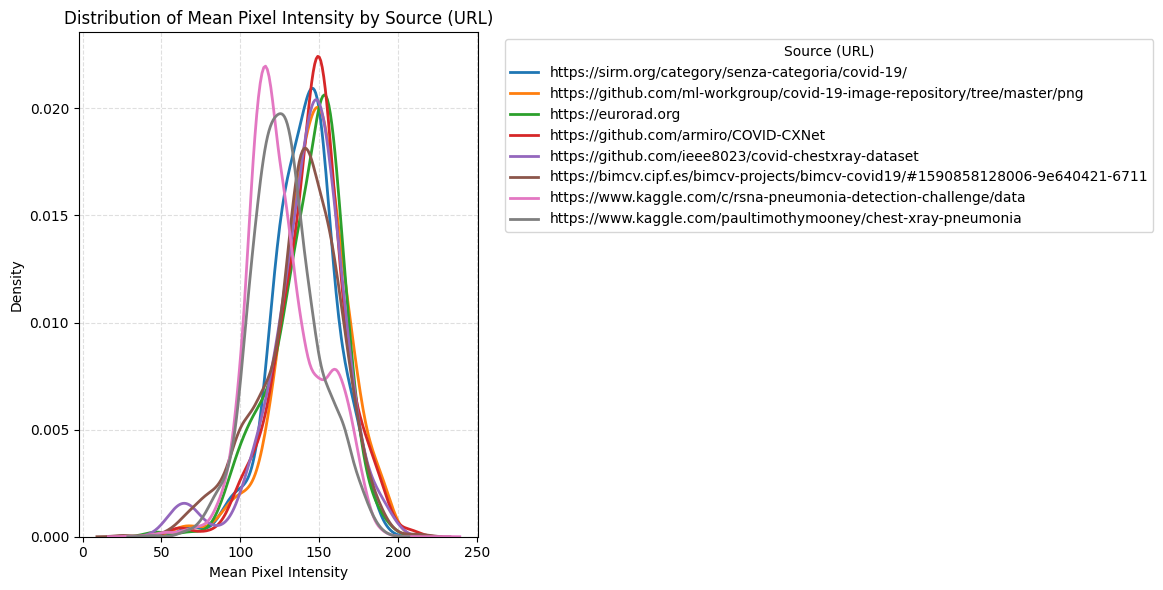

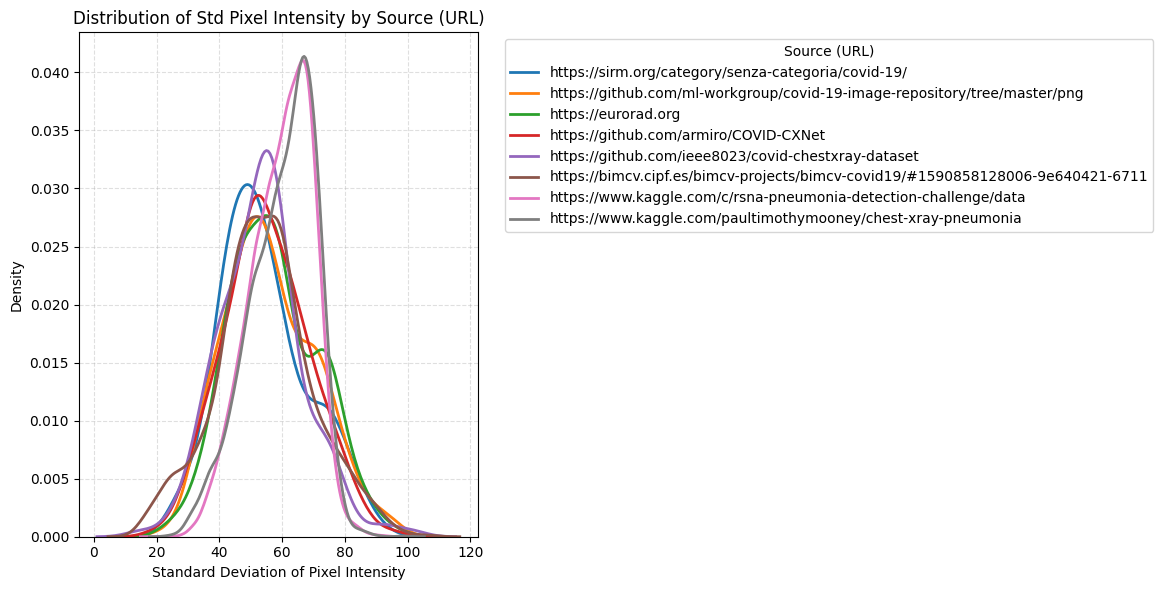

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get unique sources
sources = df_analysis['URL'].unique()

# Plot Mean Pixel Intensity by Source
plt.figure(figsize=(12, 6))
for src in sources:
    data = df_analysis[df_analysis['URL'] == src]['mean_intensity']
    if len(data) > 1:
        sns.kdeplot(data, label=src, linewidth=2)
plt.title("Distribution of Mean Pixel Intensity by Source (URL)")
plt.xlabel("Mean Pixel Intensity")
plt.ylabel("Density")
plt.legend(title="Source (URL)", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# Plot Std Pixel Intensity by Source
plt.figure(figsize=(12, 6))
for src in sources:
    data = df_analysis[df_analysis['URL'] == src]['std_intensity']
    if len(data) > 1:
        sns.kdeplot(data, label=src, linewidth=2)
plt.title("Distribution of Std Pixel Intensity by Source (URL)")
plt.xlabel("Standard Deviation of Pixel Intensity")
plt.ylabel("Density")
plt.legend(title="Source (URL)", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


In [ ]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

# Define paths
base_path = r"C:\Users\arfin\Downloads\covid xray\COVID-19_Radiography_Dataset\COVID-19_Radiography_Dataset"
classes = ["COVID", "Viral Pneumonia", "Normal", "Lung_Opacity"]

# Output path to save processed images
output_path = r"C:\Users\arfin\Downloads\processed_xrays"
os.makedirs(output_path, exist_ok=True)

# Loop through each class folder
for label in classes:
    image_dir = os.path.join(base_path, label, "images")
    mask_dir = os.path.join(base_path, label, "masks")

    processed_dir = os.path.join(output_path, label)
    os.makedirs(processed_dir, exist_ok=True)

    # List all image files
    for filename in os.listdir(image_dir):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_path = os.path.join(image_dir, filename)
            mask_path = os.path.join(mask_dir, filename)

            # Load image and mask
            img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

            if img is None or mask is None:
                print(f"Skipping {filename}: missing image or mask")
                continue

            # Resize mask to match image size
            mask_resized = cv2.resize(mask, (img.shape[1], img.shape[0]))

            # Ensure binary mask (0, 255)
            _, mask_binary = cv2.threshold(mask_resized, 127, 255, cv2.THRESH_BINARY)

            # Apply Gaussian blur
            blurred = cv2.GaussianBlur(img, (5, 5), 0)

            # Apply CLAHE
            clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
            contrast_img = clahe.apply(blurred)

            # Keep processed pixels inside lung mask, zero elsewhere
            processed_img = cv2.bitwise_and(contrast_img, contrast_img, mask=mask_binary)

            # Save processed image
            save_path = os.path.join(processed_dir, filename)
            cv2.imwrite(save_path, processed_img)

print(" All images processed and saved.")
#What this does:
#Loops through each class and its images/masks
#Reads the image and corresponding mask
#Resizes mask to 299×299 to match image
#Applies Gaussian blur
#Applies CLAHE for contrast enhancement
#Applies mask: keeps processed pixels inside lungs, zeroes background
#Saves processed images in processed_xrays\[class] folders


✅ All images processed and saved.


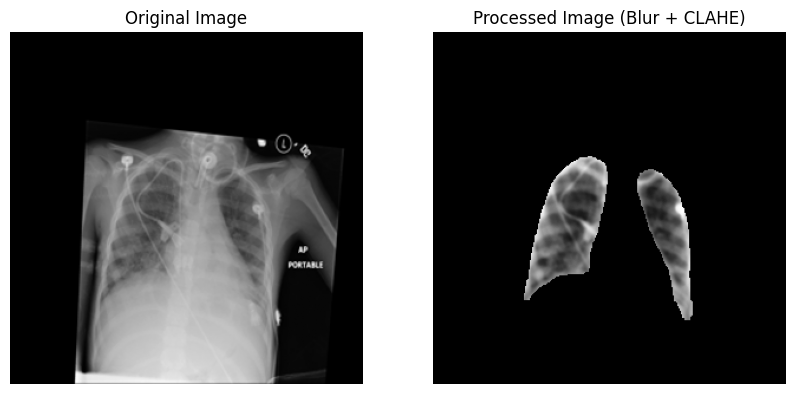

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Define paths for single image
image_path = r"C:\Users\arfin\Downloads\covid xray\COVID-19_Radiography_Dataset\COVID-19_Radiography_Dataset\Lung_Opacity\images\Lung_Opacity-99.png"  # Original image path
processed_image_path = r"C:\Users\arfin\Downloads\processed_xrays\Lung_Opacity\Lung_Opacity-99.png"  # Processed image path

# Load the original and processed images
original_img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Original image
processed_img = cv2.imread(processed_image_path, cv2.IMREAD_GRAYSCALE)  # Processed image

# Check if images are loaded correctly
if original_img is None:
    print(f"Error loading the original image from {image_path}")
if processed_img is None:
    print(f"Error loading the processed image from {processed_image_path}")

# Only proceed if both images are loaded successfully
if original_img is not None and processed_img is not None:
    # Plotting side by side
    plt.figure(figsize=(10, 5))

    # Display original image
    plt.subplot(1, 2, 1)
    plt.imshow(original_img, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    # Display processed image
    plt.subplot(1, 2, 2)
    plt.imshow(processed_img, cmap='gray')
    plt.title('Processed Image (Blur + CLAHE)')
    plt.axis('off')

    plt.show()
else:
    print("One or both images failed to load. Please check the file paths.")



In [ ]:
import numpy as np
import cv2
import os

# Paths
base_path = r"C:\Users\arfin\Downloads\processed_xrays"
classes = ["COVID", "Viral Pneumonia", "Normal", "Lung_Opacity"]

images = []
labels = []

# Load images into list
for label in classes:
    image_dir = os.path.join(base_path, label)
    for filename in os.listdir(image_dir):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_path = os.path.join(image_dir, filename)
            img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                images.append(img)
                labels.append(label)

# Convert to NumPy arrays
images_np = np.array(images)
labels_np = np.array(labels)

# Save to .npz file
np.savez_compressed(r"C:\Users\arfin\Downloads\xray_dataset.npz", images=images_np, labels=labels_np)

print(" Images and labels saved to .npz file.")


✅ Images and labels saved to .npz file.


In [ ]:
import numpy as np
import pandas as pd

# Load dataset
data = np.load(r"C:\Users\arfin\Downloads\xray_dataset.npz")
images_np = data['images']
labels_np = data['labels']

# Lists to store results
mean_intensities = []
std_intensities = []

# Loop through images
for img in images_np:
    pixels_in_mask = img[img > 0]  # non-zero pixels (inside mask)

    if len(pixels_in_mask) > 0:
        mean_intensity = np.mean(pixels_in_mask)
        std_intensity = np.std(pixels_in_mask)
    else:
        mean_intensity, std_intensity = 0, 0  # or np.nan if no mask

    mean_intensities.append(mean_intensity)
    std_intensities.append(std_intensity)

# Create a DataFrame with results
df_stats = pd.DataFrame({
    'label': labels_np,
    'mean_intensity': mean_intensities,
    'std_intensity': std_intensities
})

# Save stats to CSV 
df_stats.to_csv(r"C:\Users\arfin\Downloads\xray_masked_stats.csv", index=False)

# Show summary
print(df_stats.head())


   label  mean_intensity  std_intensity
0  COVID      126.391402      39.033796
1  COVID      117.685818      32.649107
2  COVID      110.924209      48.022406
3  COVID      118.527285      52.318689
4  COVID      114.270570      42.192162


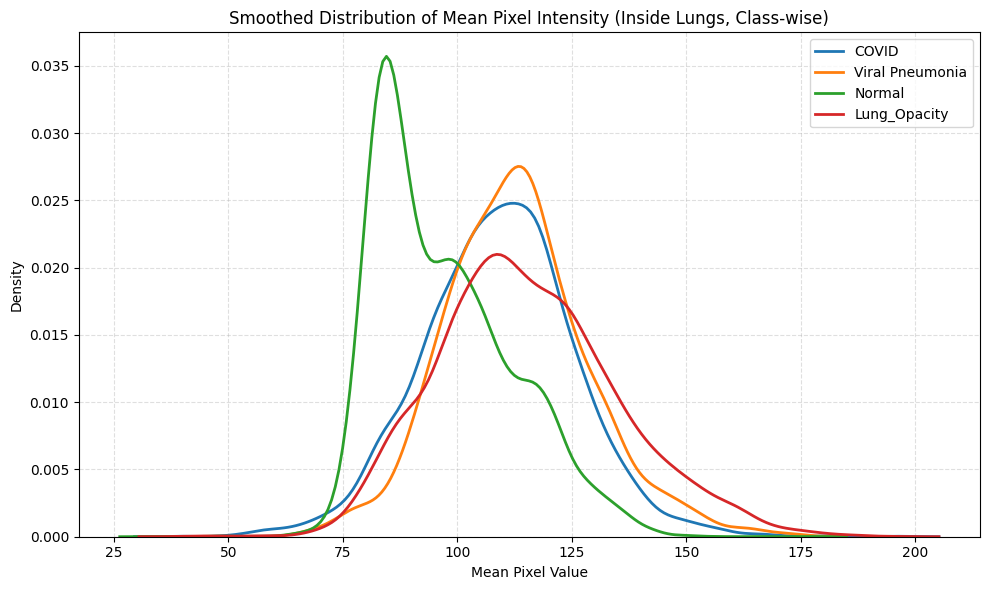

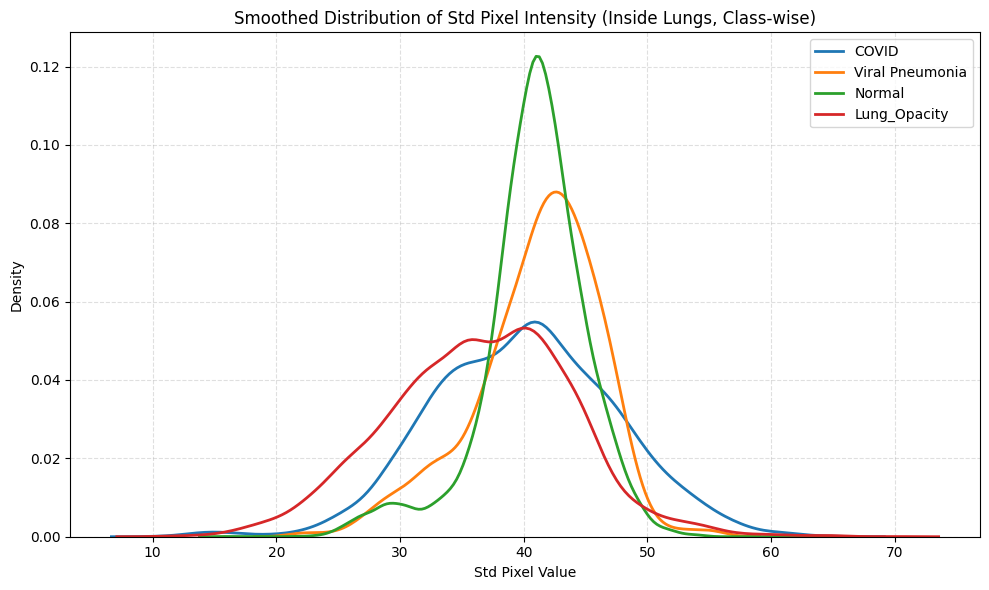

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot KDE for Mean Intensity (Class-wise)
plt.figure(figsize=(10, 6))

for cls in classes:
    class_data = df_stats[df_stats['label'] == cls]['mean_intensity']
    sns.kdeplot(class_data, label=cls, linewidth=2)

plt.title("Smoothed Distribution of Mean Pixel Intensity (Inside Lungs, Class-wise)")
plt.xlabel("Mean Pixel Value")
plt.ylabel("Density")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# Plot KDE for Std Intensity (Class-wise)
plt.figure(figsize=(10, 6))

for cls in classes:
    class_data = df_stats[df_stats['label'] == cls]['std_intensity']
    sns.kdeplot(class_data, label=cls, linewidth=2)

plt.title("Smoothed Distribution of Std Pixel Intensity (Inside Lungs, Class-wise)")
plt.xlabel("Std Pixel Value")
plt.ylabel("Density")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


In [ ]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

# Define paths
input_path = r"C:\Users\arfin\Downloads\processed_xrays"
output_path = r"C:\Users\arfin\Downloads\normalized_xrays"
os.makedirs(output_path, exist_ok=True)

# Function to normalize an image (to the range [0, 1])
def normalize_image(img):
    return img / 255.0

# List all files in the processed_xrays folder
for label in os.listdir(input_path):
    label_dir = os.path.join(input_path, label)
    
    if os.path.isdir(label_dir):
        # Create corresponding output folder for normalized images
        label_output_dir = os.path.join(output_path, label)
        os.makedirs(label_output_dir, exist_ok=True)

        # Loop through all the images in the current label folder
        for filename in os.listdir(label_dir):
            if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                image_path = os.path.join(label_dir, filename)

                # Load the image in grayscale
                img_gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

                if img_gray is not None:
                    # Normalize the image
                    normalized_img = normalize_image(img_gray)

                    # Save the normalized image
                    normalized_image_path = os.path.join(label_output_dir, filename)
                    cv2.imwrite(normalized_image_path, (normalized_img * 255).astype(np.uint8))

print("All images normalized and saved.")



✅ All images normalized and saved.


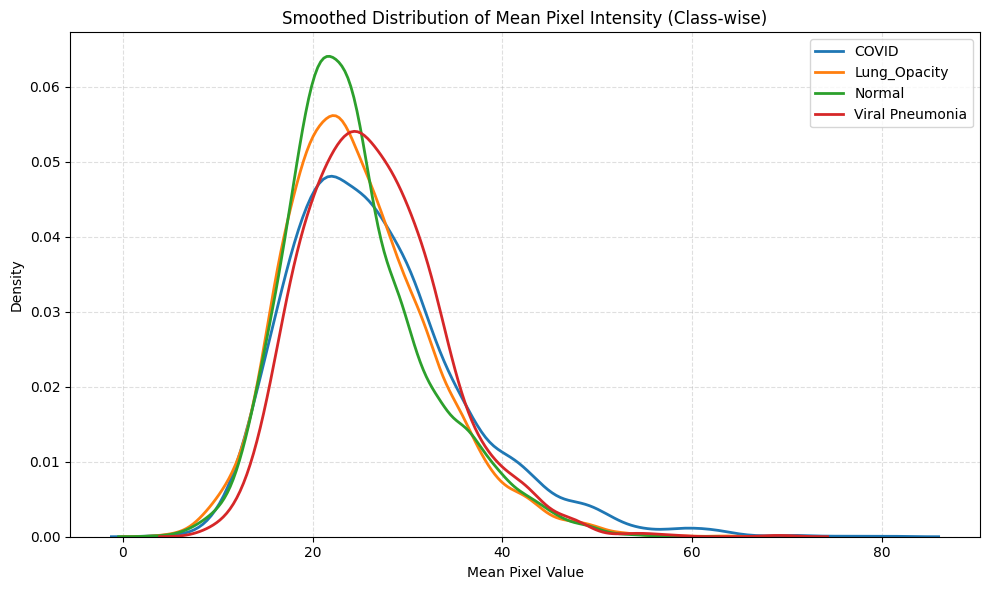

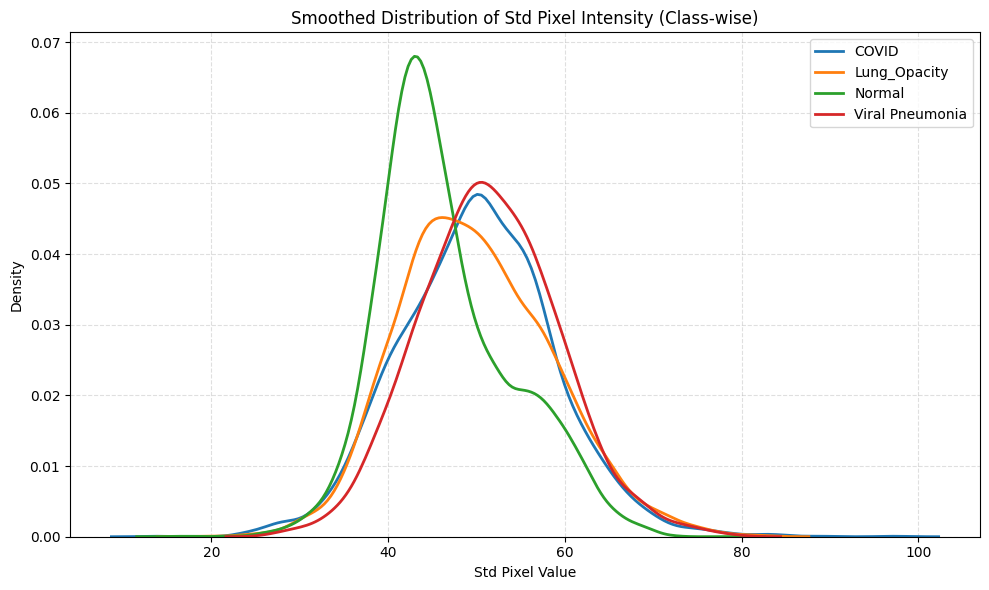

In [14]:
import seaborn as sns
# Initialize dictionaries to store mean and std values by class
class_means = {label: [] for label in os.listdir(input_path)}
class_stds = {label: [] for label in os.listdir(input_path)}

# Loop through all the images in the dataset and compute mean and std per class
for label in os.listdir(input_path):
    label_dir = os.path.join(input_path, label)
    if os.path.isdir(label_dir):
        for filename in os.listdir(label_dir):
            if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                image_path = os.path.join(label_dir, filename)
                img_gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

                if img_gray is not None:
                    # Calculate mean and standard deviation
                    mean_intensity = np.mean(img_gray)
                    std_intensity = np.std(img_gray)

                    # Append to the respective class lists
                    class_means[label].append(mean_intensity)
                    class_stds[label].append(std_intensity)

# Plot KDE for Mean Intensity (Class-wise)
plt.figure(figsize=(10, 6))

for cls, means in class_means.items():
    sns.kdeplot(means, label=cls, linewidth=2)

plt.title("Smoothed Distribution of Mean Pixel Intensity (Class-wise)")
plt.xlabel("Mean Pixel Value")
plt.ylabel("Density")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# Plot KDE for Std Intensity (Class-wise)
plt.figure(figsize=(10, 6))

for cls, stds in class_stds.items():
    sns.kdeplot(stds, label=cls, linewidth=2)

plt.title("Smoothed Distribution of Std Pixel Intensity (Class-wise)")
plt.xlabel("Std Pixel Value")
plt.ylabel("Density")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

                                                 URL  mean_int_mean  \
0  https://bimcv.cipf.es/bimcv-projects/bimcv-cov...       0.099662   
1                                https://eurorad.org       0.116863   
2              https://github.com/armiro/COVID-CXNet       0.112817   
3  https://github.com/ieee8023/covid-chestxray-da...       0.121862   
4  https://github.com/ml-workgroup/covid-19-image...       0.112682   
5  https://sirm.org/category/senza-categoria/covi...       0.115687   
6  https://www.kaggle.com/c/rsna-pneumonia-detect...       0.096320   
7  https://www.kaggle.com/paultimothymooney/chest...       0.101331   

   mean_int_std  std_int_mean  std_int_std  
0      0.033628      0.191513     0.033224  
1      0.040528      0.205453     0.033015  
2      0.039515      0.206523     0.032522  
3      0.042596      0.213285     0.037451  
4      0.040550      0.205555     0.033164  
5      0.031267      0.205042     0.027611  
6      0.029329      0.187388     0.032003  


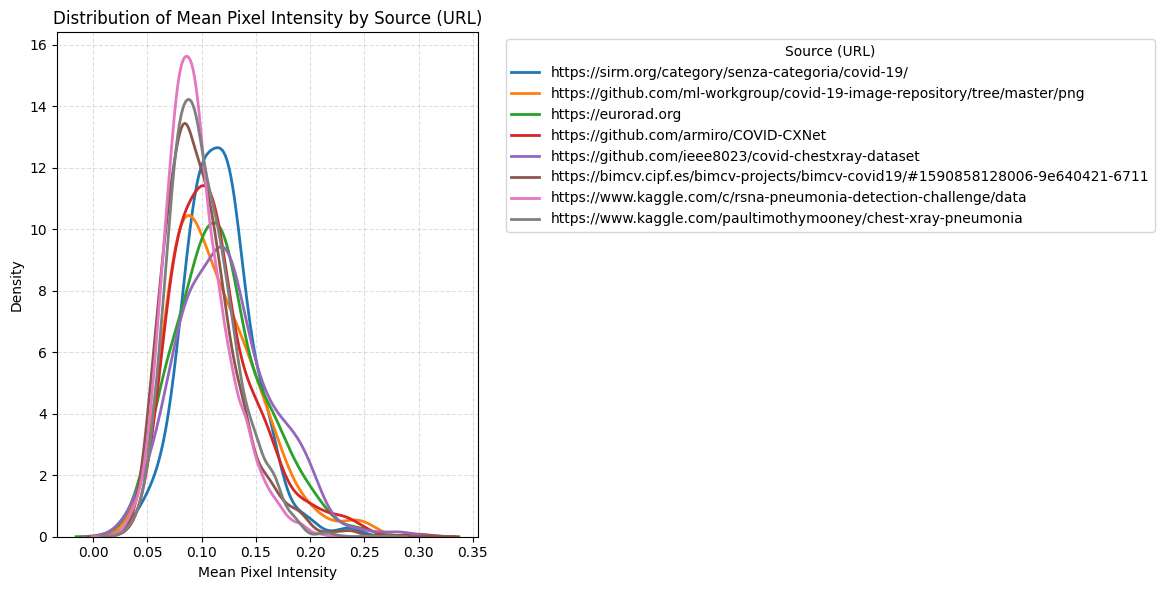

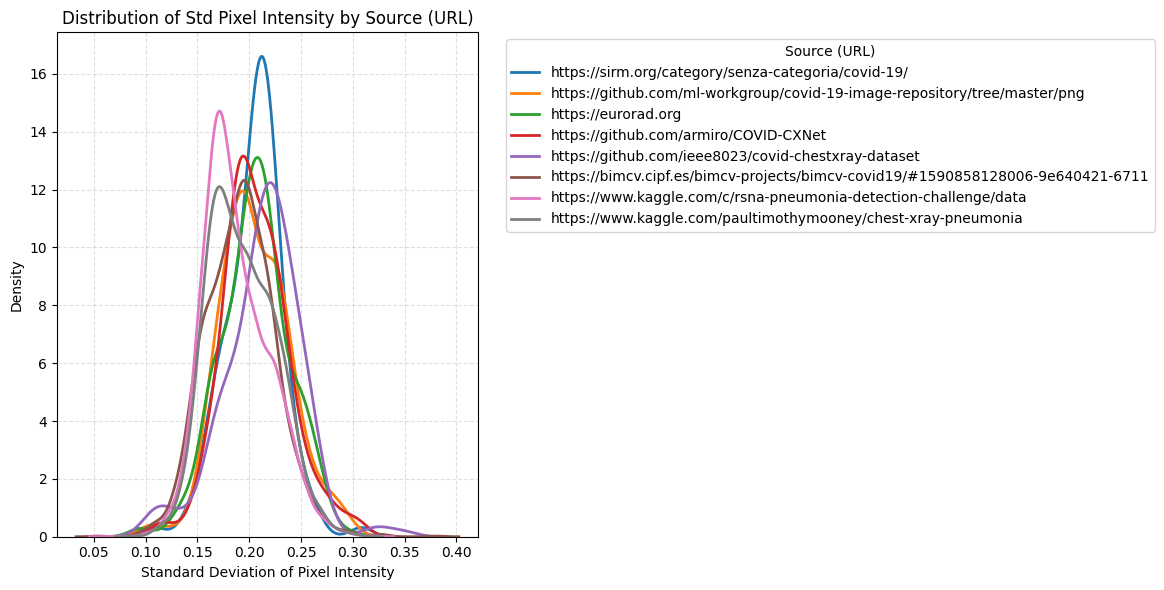

In [31]:
import os
import pandas as pd
import numpy as np
from PIL import Image
from collections import defaultdict
import matplotlib.pyplot as plt

# Paths
normalized_path = r"C:\Users\arfin\Downloads\normalized_xrays"  # normalized images path

url_metadata = defaultdict(list)

# Loop through metadata to match files with their normalized versions
for idx, row in df_all.iterrows():
    label = row['label']
    url = row['URL']
    file = row['FILE NAME'] if 'FILE NAME' in row else row['filename']
    if not file.lower().endswith(('.png', '.jpg', '.jpeg')):
        file += '.png'

    image_path = os.path.join(normalized_path, label, file)
    if os.path.exists(image_path):
        try:
            with Image.open(image_path) as img:
                img_gray = img.convert("L")
                pixel_data = np.array(img_gray).astype(np.float32) / 255.0  # ensure normalized

                mean_intensity = np.mean(pixel_data)
                std_intensity = np.std(pixel_data)

                info = {
                    "filename": file,
                    "label": label,
                    "mean_intensity": mean_intensity,
                    "std_intensity": std_intensity
                }
                url_metadata[url].append(info)
        except Exception as e:
            print(f"Error processing {image_path}: {e}")
    else:
        print(f"Missing file: {image_path}")

# Convert to DataFrame for plotting/analysis
metadata_dfs = []
for url, items in url_metadata.items():
    df = pd.DataFrame(items)
    df['URL'] = url
    metadata_dfs.append(df)

df_analysis = pd.concat(metadata_dfs, ignore_index=True)

# Group by URL and compute stats
url_grouped = df_analysis.groupby("URL").agg({
    "mean_intensity": ['mean', 'std'],
    "std_intensity": ['mean', 'std']
}).reset_index()
url_grouped.columns = ['URL', 'mean_int_mean', 'mean_int_std', 'std_int_mean', 'std_int_std']

# Show summary table
print(url_grouped)

import seaborn as sns
import matplotlib.pyplot as plt

# Get unique sources
sources = df_analysis['URL'].unique()

# --- Mean Intensity KDE Plot ---
plt.figure(figsize=(12, 6))
for src in sources:
    data = df_analysis[df_analysis['URL'] == src]['mean_intensity']
    if len(data) > 1:
        sns.kdeplot(data, label=src, linewidth=2)
plt.title("Distribution of Mean Pixel Intensity by Source (URL)")
plt.xlabel("Mean Pixel Intensity")
plt.ylabel("Density")
plt.legend(title="Source (URL)", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# --- Std Deviation KDE Plot ---
plt.figure(figsize=(12, 6))
for src in sources:
    data = df_analysis[df_analysis['URL'] == src]['std_intensity']
    if len(data) > 1:
        sns.kdeplot(data, label=src, linewidth=2)
plt.title("Distribution of Std Pixel Intensity by Source (URL)")
plt.xlabel("Standard Deviation of Pixel Intensity")
plt.ylabel("Density")
plt.legend(title="Source (URL)", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


